In [1]:
from sklearn.model_selection import train_test_split
from wbn.classifier import WBN
from wbn.sample.datasets import load_pr_newswire

In [2]:
# Load dataset
pr_newswire = load_pr_newswire()

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
    pr_newswire.data, pr_newswire.target, test_size=0.2
)

In [3]:
# Build WBN
wbn = WBN()

# Fit WBN Model
wbn.fit(x_train, y_train)

[Classification(dag=<networkx.classes.digraph.DiGraph object at 0x105044520>, cls='stock-split', corpus=['round', 'consolid', 'propos', 'forward', 'record', 'reclassifi', 'implement', 'expect', 'trade', 'lieu', 'revers', 'fraction', 'share', 'ratio', 'evenli', 'declar', 'basi', 'post', 'complet', 'dividend', 'receiv', 'adjust', 'effectu', 'payabl', 'author', 'proport', 'stockhold', 'reduc', 'close', 'result', 'new', 'split', 'exact', 'stock', 'pre', 'date', 'outstand', 'effect', 'approv', 'cash', 'payment', 'busi', 'announc']),
 Classification(dag=<networkx.classes.digraph.DiGraph object at 0x1050441c0>, cls='merger-acquisition', corpus=['acquisit', 'merger', 'success', 'price', 'entri', 'acquir', 'valu', 'own', 'includ', 'agreement', 'asset', 'state', 'share', 'preliminari', 'letter', 'ownership', 'substanti', 'receiv', 'major', 'adjust', 'equiti', 'deal', 'certain', 'definit', 'term', 'mergerco', 'close', 'strateg', 'subject', 'reorgan', 'relat', 'condit', 'stock', 'ordinari', 'outst

In [4]:
# Predict
pred = wbn.predict(x_test)

# Reverse encode classes
y_pred = wbn.reverse_encode(target=pred)

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    recall_score,
    precision_score,
)

In [6]:
c_matrix = confusion_matrix(y_test, y_pred)

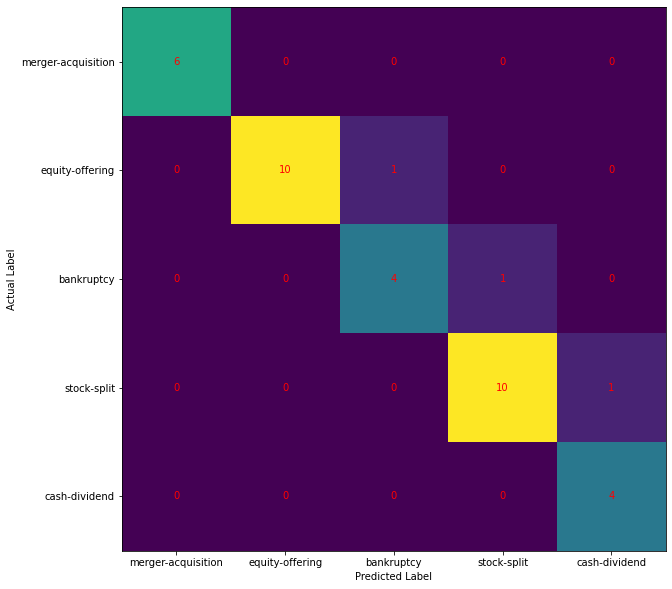

In [7]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(c_matrix)

ax.set_ylabel("Actual Label")
ax.set_xlabel("Predicted Label")
labels = tuple(wbn.reverse_encode([0, 1, 2, 3, 4]))
ax.xaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
ax.yaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
for i in range(len(labels)):  # ref: (https://realpython.com/logistic-regression-python/)
    for j in range(len(labels)):
        ax.text(j, i, c_matrix[i, j], ha='center', va='center', color='red')

In [8]:
# Calculate key metrics
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Accuracy Score: {accuracy}")

Precision Score: 0.9243243243243244
Recall Score: 0.918918918918919
Accuracy Score: 0.918918918918919
